# Airlines Tweets Analysis



 Instruction 1/2: Import the necessary libraries and dependencies, including numpy, pandas, BeautifulSoup, matplotlib.pyplot, seaborn, and nltk.

In [1]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import roc_curve, auc

Instruction 3: Load the dataset using pandas and store it in a DataFrame, such as data.

In [2]:
#load our data set
df = pd.read_csv('/kaggle/input/altweets/Tweets.csv')

In [3]:
df.shape


(14640, 15)

Instruction 4: Clean the dataset by removing rows with low confidence levels (airline_sentiment_confidence <= 0.65).

In [4]:
# Filter rows with airline_sentiment_confidence > 0.65
df_cleaned = df[df['airline_sentiment_confidence'] > 0.65].copy()

In [5]:
# Inspect the result
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
df_cleaned.head()

Original shape: (14640, 15)
Cleaned shape: (13651, 15)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df_cleaned.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


instruction 5: Create a new column sentiment based on the airline_sentiment, where negative sentiment is encoded as 1 and non-negative sentiment as 0.

In [7]:
# Define the mapping: negative=1, non-negative (neutral/positive)=0
sentiment_mapping = {'negative': 1, 'neutral': 0, 'positive': 0}

# Create the new 'sentiment_binary' column
df_cleaned['sentiment_binary'] = df_cleaned['airline_sentiment'].map(sentiment_mapping)

In [8]:
# Display the new distribution
print("Distribution of the new binary target variable:")
print(df_cleaned['sentiment_binary'].value_counts())

# Display the first few rows to verify
print("\nFirst 5 rows with the new binary sentiment column:")
print(df_cleaned[['airline_sentiment', 'sentiment_binary']].head())

Distribution of the new binary target variable:
sentiment_binary
1    8787
0    4864
Name: count, dtype: int64

First 5 rows with the new binary sentiment column:
  airline_sentiment  sentiment_binary
0           neutral                 0
2           neutral                 0
3          negative                 1
4          negative                 1
5          negative                 1


In [9]:
df_cleaned.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment_binary
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),0
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),0
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),0
10,570294189143031808,neutral,0.6769,NaN,0.0000,Virgin America,NaN,idk_but_youtube,NaN,0,@VirginAmerica did you know that suicide is th...,NaN,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada),0
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York,0


In [10]:
#checking columns in our data
df_cleaned.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'sentiment_binary'],
      dtype='object')

In [11]:
#checking info our data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13651 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      13651 non-null  int64  
 1   airline_sentiment             13651 non-null  object 
 2   airline_sentiment_confidence  13651 non-null  float64
 3   negativereason                8787 non-null   object 
 4   negativereason_confidence     9720 non-null   float64
 5   airline                       13651 non-null  object 
 6   airline_sentiment_gold        39 non-null     object 
 7   name                          13651 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 13651 non-null  int64  
 10  text                          13651 non-null  object 
 11  tweet_coord                   960 non-null    object 
 12  tweet_created                 13651 non-null  object 
 13  tweet_

In [12]:
#checking null values in our data
df_cleaned.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   4864
negativereason_confidence        3931
airline                             0
airline_sentiment_gold          13612
name                                0
negativereason_gold             13619
retweet_count                       0
text                                0
tweet_coord                     12691
tweet_created                       0
tweet_location                   4406
user_timezone                    4514
sentiment_binary                    0
dtype: int64

In [13]:
#treating with null value
df_cleaned.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   4864
negativereason_confidence        3931
airline                             0
airline_sentiment_gold          13612
name                                0
negativereason_gold             13619
retweet_count                       0
text                                0
tweet_coord                     12691
tweet_created                       0
tweet_location                   4406
user_timezone                    4514
sentiment_binary                    0
dtype: int64

In [14]:
print("Percentage null or na values in df")
((df_cleaned.isnull() | df_cleaned.isna()).sum() * 100 / df_cleaned.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  35.63
negativereason_confidence       28.80
airline                          0.00
airline_sentiment_gold          99.71
name                             0.00
negativereason_gold             99.77
retweet_count                    0.00
text                             0.00
tweet_coord                     92.97
tweet_created                    0.00
tweet_location                  32.28
user_timezone                   33.07
sentiment_binary                 0.00
dtype: float64

In [15]:
#del df_cleaned['airline_sentiment']
del df_cleaned['tweet_coord']
del df_cleaned['airline_sentiment_gold']
del df_cleaned['negativereason_gold']


In [16]:
df_cleaned.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone', 'sentiment_binary'],
      dtype='object')

In [17]:
df_cleaned.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment_binary
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1


Instruction 6: Apply text cleaning to the text column using BeautifulSoup to remove HTML tags and special characters. Store the cleaned text in a new column called text_clean.

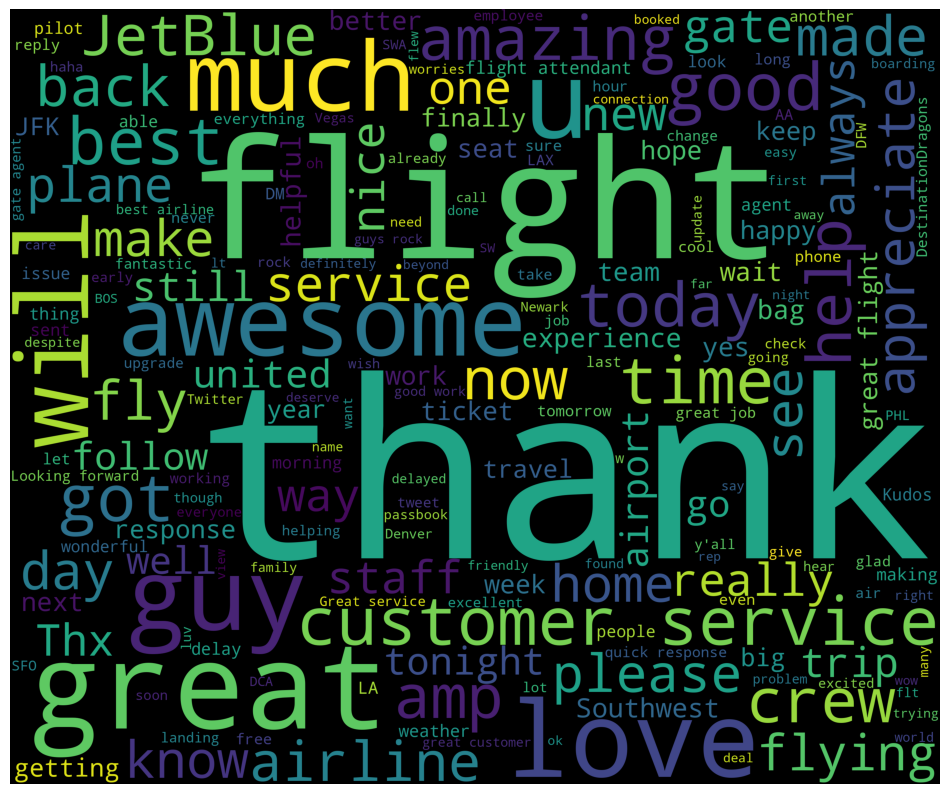

In [18]:
new_df=df_cleaned[df_cleaned['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

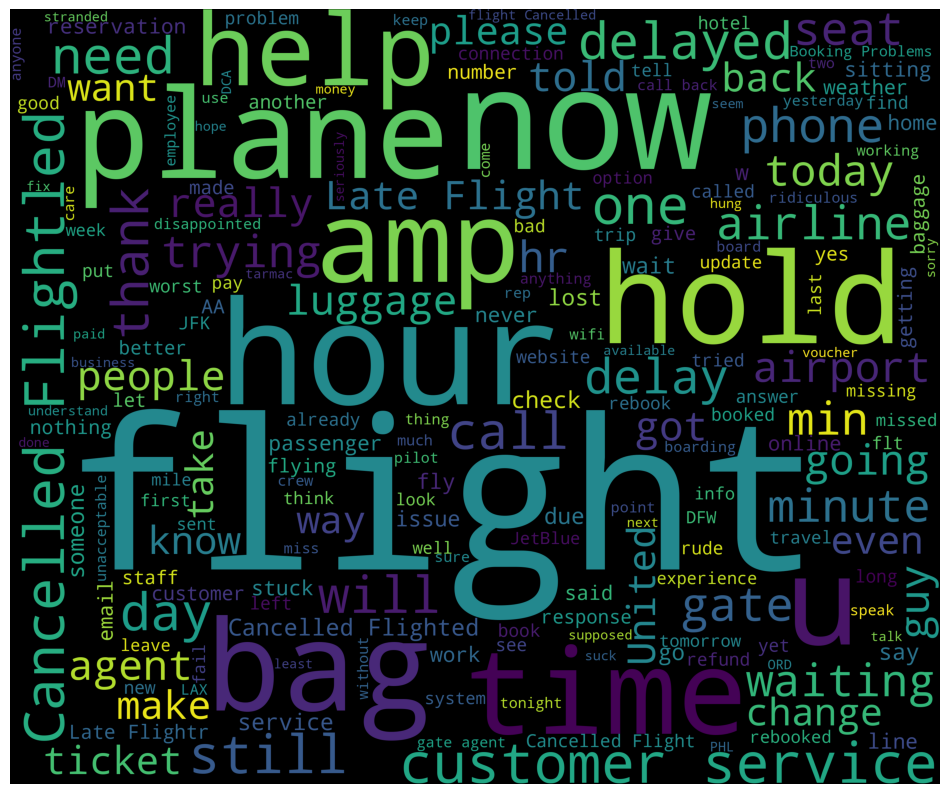

In [19]:
new_df=df_cleaned[df_cleaned['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
df_cleaned.drop(df_cleaned.loc[df_cleaned['airline_sentiment']=='neutral'].index, inplace=True)

In [21]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [22]:
nltk.download('stopwords')
df_cleaned['clean_tweet']=df_cleaned['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df_cleaned.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment_binary,clean_tweet
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1,virginamerica really big bad thing
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1,virginamerica seriously would pay flight seats...
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),0,virginamerica yes nearly every time fly vx ear...
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),0,virginamerica well


Instruction 7: Retain only the relevant columns text_clean and sentiment for further analysis.

In [24]:
x = df_cleaned.clean_tweet
y = df_cleaned.sentiment_binary

print(len(x), len(y))

10951 10951


## Perform sentiment analysis on Twitter data using Support Vector Machine (SVM) algorithm.

Instruction 1: Split the cleaned data into training and testing subsets using the train_test_split function, with a test size of 20% and a random state of 1.

In [25]:
# 2. Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8760 8760
2191 2191


Instruction 2: Extract the text features (X) from the training and testing data, and the corresponding sentiment labels (y).

In [26]:
# 3. Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test) 

Instruction 8: Build a pipeline for SVM classification, including the vectorizer and SVC with the following configurations: Probability: True / Kernel: "linear" / Class weight: "balanced"

In [27]:
# 4. Train the Best Estimator (SVC)
# NOTE: SVC must be initialized with probability=True for ROC curve plotting.
model = SVC(probability=True, random_state=42)
model.fit(X_train_tfidf, y_train)
pred = model.predict(X_test_tfidf)


In [28]:
#accuracy score
accuracy_score(y_test,pred)

0.9183021451392058

In [29]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 277,  156],
       [  23, 1735]])

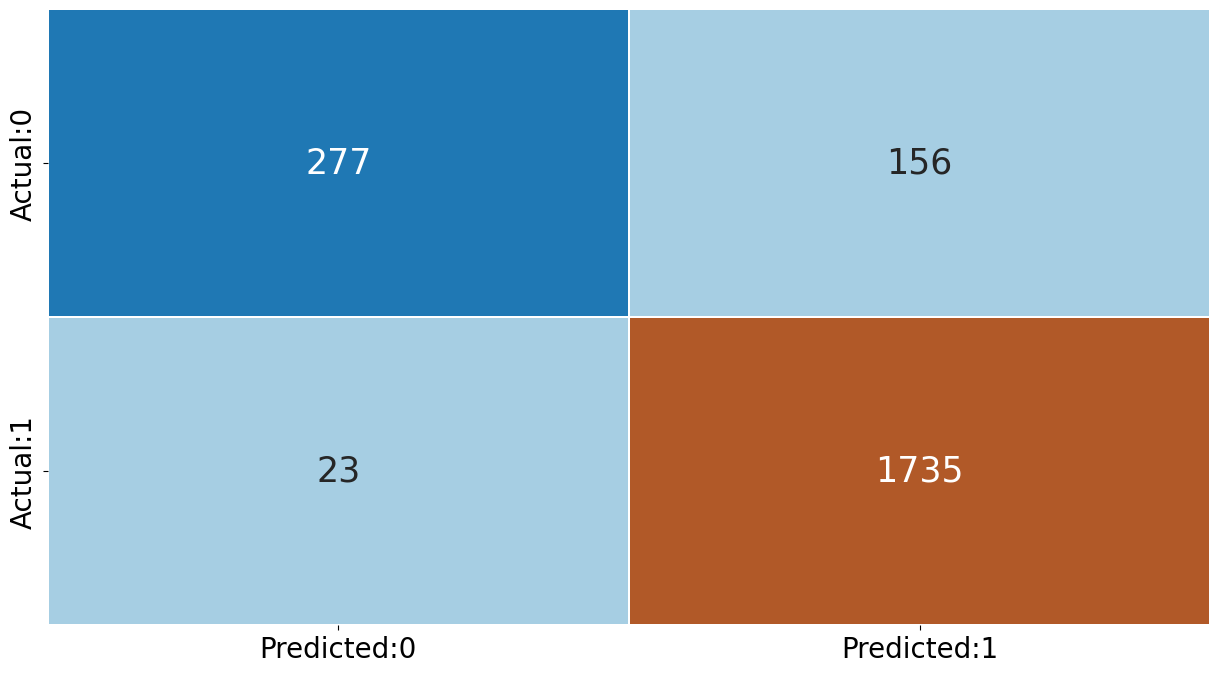

In [30]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

Instruction 9: Implement the report_results function to generate performance metrics (AUC, accuracy, F1 score, precision, recall) for the best estimator on the testing data.

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76       433
           1       0.92      0.99      0.95      1758

    accuracy                           0.92      2191
   macro avg       0.92      0.81      0.85      2191
weighted avg       0.92      0.92      0.91      2191



Instructions: 10/11/12

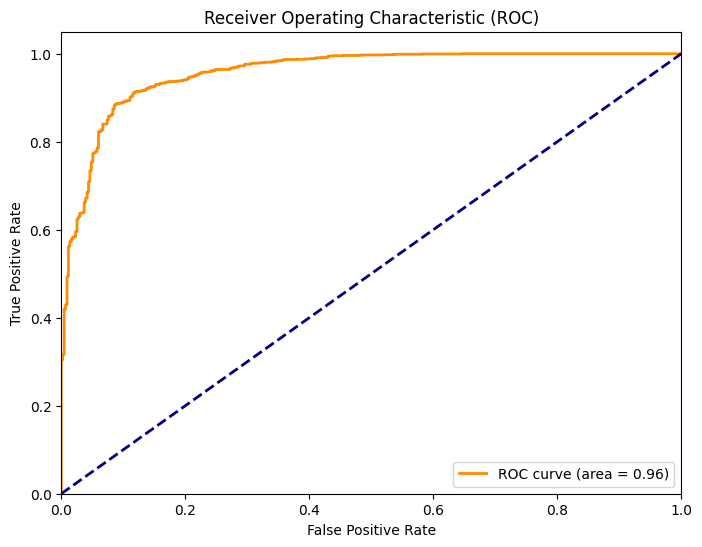

Final AUC Score: 0.96


In [32]:
# 5. ROC Curve Function
def get_roc_curve(model, X_test, y_test):
    """
    Generates and plots the ROC curve for the best estimator on the testing data.
    """
    # Get predicted probabilities for the positive class (class 1)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show() 
    
    return roc_auc

# 6. Generate the ROC curve
auc_score = get_roc_curve(model, X_test_tfidf, y_test)
print(f"Final AUC Score: {auc_score:.2f}")

Instruction 13: Use the best estimator to predict the sentiment of a sample tweet.

In [33]:
# Define sample tweets to test
sample_tweets = [
    "@VirginAmerica Your service was amazing! I love flying with you.",
    "@VirginAmerica I am very frustrated. My flight was delayed and my luggage is lost."
]

print("--- Sentiment Prediction on Sample Tweets ---")

for raw_tweet in sample_tweets:
    # 1. Clean the tweet using the function defined in previous steps
    # (Assuming 'tweet_to_words_fallback' is the function currently in memory)
    cleaned_tweet = tweet_to_words(raw_tweet) 
    
    # 2. Vectorize the tweet using the ALREADY FITTED vectorizer
    # Note: We must pass a list [cleaned_tweet] to transform
    tweet_vectorized = tfidf_vectorizer.transform([cleaned_tweet])
    
    # 3. Predict using the trained model
    prediction = model.predict(tweet_vectorized)[0]
    
    # 4. Map the binary prediction (0 or 1) to a readable label
    # Remember: 1 was mapped to 'negative', 0 to 'non-negative'
    sentiment_label = "Negative" if prediction == 1 else "Non-Negative"
    
    print(f"\nOriginal Tweet: {raw_tweet}")
    print(f"Predicted Sentiment: {sentiment_label}")

--- Sentiment Prediction on Sample Tweets ---

Original Tweet: @VirginAmerica Your service was amazing! I love flying with you.
Predicted Sentiment: Non-Negative

Original Tweet: @VirginAmerica I am very frustrated. My flight was delayed and my luggage is lost.
Predicted Sentiment: Negative
